<a href="https://colab.research.google.com/github/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 「ニューラルネットワーク ― 仕組みの理解×初めての実装（全3回）」 ― 連載『TensorFlow 2.0＋Keras（ tf.keras）入門』のノートブック

<table valign="middle">
  <td>
    <a target="_blank" href="https://www.atmarkit.co.jp/ait/subtop/features/di/tf2keras_index.html"> <img src="https://re.deepinsider.jp/img/ml-logo/manabu.svg"/>Deep Insiderで記事を読む</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_neuralnetwork.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/gcolab.svg" />Google Colabで実行する</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_neuralnetwork.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/github.svg" />GitHubでソースコードを見る</a>
  </td>
</table>

# 第1回　初めてのニューラルネットワーク実装の準備をしよう ― 仕組み理解×初実装（前編）

## ■ディープラーニングの大まかな流れ

- （1）データ準備
- （2）問題種別
- （3）前処理
- （4）“手法” の選択： モデルの定義
- （5）“学習方法” の設計： モデルの生成
- （6）学習 ： トレーニング
- （7）評価
- （8）テスト

## ■（1）データ準備

### 【チェック】Pythonバージョン（※3系を使うこと）
Colabにインストール済みのものを使う。もし2系になっている場合は、メニューバーの［ランタイム］－［ランタイムのタイプを変更］をクリックして切り替えてほしい。

In [1]:
import sys
print('Python', sys.version)
# Python 3.6.8 (default, Jan 14 2019, 11:02:34) …… などと表示される

Python 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


### リスト1　座標点データを生成するライブラリのインストール

In [1]:
!pip install playground-data

  Created wheel for playground-data: filename=playground_data-1.1.0-py2.py3-none-any.whl size=20827 sha256=5332eb27a88dec46b7bd1a9cee3825e3b5ad5f143f957b6183e09dcd34ee7217
  Stored in directory: /root/.cache/pip/wheels/82/07/a9/68dc3f1c2cca3ce57b735854edda3620fb089f3ac64b9acfd4
Successfully built playground-data


## ■（2）問題種別

### リスト2　問題種別とデータ種別の選択

In [0]:
# playground-dataライブラリのplygdataパッケージを「pg」という別名でインポート
import plygdata as pg

# 問題種別で「分類（Classification）」を選択し、
# データ種別で「2つのガウシアンデータ（TwoGaussData）」を選択する場合の、
# 設定値を定数として定義
PROBLEM_DATA_TYPE = pg.DatasetType.ClassifyTwoGaussData

# ※実際のデータ生成は、後述の「pg.generate_data()関数の呼び出し」で行う

## ■（3）前処理

### リスト3　前処理としてのデータ分割

In [0]:
# 各種設定を定数として定義
TRAINING_DATA_RATIO = 0.5  # データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用) ： 50％
DATA_NOISE = 0.0           # ノイズ： 0％

# 定義済みの定数を引数に指定して、データを生成する
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)

# データを「訓練用」と「精度検証用」を指定の比率で分割し、さらにそれぞれを「データ（X）」と「教師ラベル（y）」に分ける
X_train, y_train, X_valid, y_valid = pg.split_data(data_list, training_size=TRAINING_DATA_RATIO)

### 【チェック】データ分割後の各変数の内容例

In [0]:
# それぞれ5件ずつ出力
print('X_train:'); print(X_train[:5])
print('y_train:'); print(y_train[:5])
print('X_valid:'); print(X_valid[:5])
print('y_valid:'); print(y_valid[:5])

X_train:
[[ 2.60705607  3.18180848]
 [-1.78263511 -1.80439237]
 [-1.49442318 -1.68884271]
 [-2.25127583 -2.24301428]
 [ 1.67867134  2.29377389]]
y_train:
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
X_valid:
[[-2.14218224 -1.99999585]
 [-1.51549029 -1.03161204]
 [-1.29757924 -1.8542762 ]
 [ 1.94858     0.93524059]
 [ 3.0082902   1.46211305]]
y_valid:
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]


# 第2回　ニューラルネットワーク最速入門 ― 仕組み理解×初実装（中編）

## ■（4）“手法”の選択とモデルの定義： ニューロン

### 活性化関数のグラフ（前編）
後掲する（後編）に続きます。

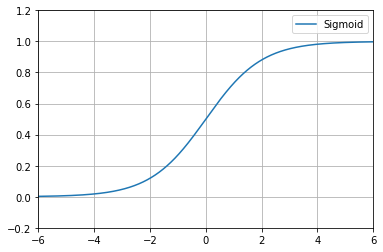

In [0]:
#@title シグモイド関数
# This code will be hidden when the notebook is loaded.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-6.0, 6.0, 0.001)
plt.plot(x, sigmoid(x), label = "Sigmoid")
plt.xlim(-6, 6)
plt.ylim(-0.2, 1.2)
plt.grid()
plt.legend()
plt.show()

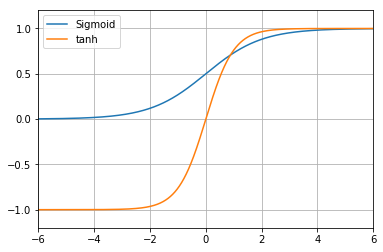

In [0]:
#@title tanh関数
# This code will be hidden when the notebook is loaded.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

x = np.arange(-6.0, 6.0, 0.001)
plt.plot(x, sigmoid(x), label = "Sigmoid")
plt.plot(x, tanh(x), label = "tanh")
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.grid()
plt.legend()
plt.show()

### 【チェック】TensorFlowバージョン（※2系を使うこと）
基本的にはColabにインストール済みのものを使う。もし2系になっている場合は、リスト4-0を実行してバージョン2.0を使う。

In [0]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 1.15.0-rc3 ……などと表示される

TensorFlow 2.0.0


### リスト4-0　［オプション］ライブラリ「TensorFlow」最新バージョンのインストール

In [1]:
# 最新バージョンにアップグレードする場合
!pip install --upgrade tensorflow

# バージョンを明示してアップグレードする場合
#!pip install --upgrade tensorflow==2.0.0

# 最新バージョンをインストールする場合
#!pip install tensorflow

# バージョンを明示してインストールする場合
#!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 39kB/s 
     |████████████████████████████████| 3.8MB 35.2MB/s 
     |████████████████████████████████| 450kB 53.4MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled

### ［オプション］【チェック】TensorFlowバージョン（※インストール後の確認）
バージョン2.xになっているか再度チェックする。

In [0]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 2.0.0 ……などと表示される

TensorFlow 2.0.0


### リスト4-1　ニューロンのモデル設計
- ニューロンへの入力＝$(w_1 \times X_1)+(w_2 \times X_2)+b$
- ニューロンからの出力＝$a((w_1 \times X_1)+(w_2 \times X_2)+b)$
  - $a()$は活性化関数を意味する。つまりニューロンの入力結果を、活性化関数で変換したうえで、出力する
  - 今回の活性化関数は、**tanh**関数とする
- $w_1=0.6$、$w_2=-0.2$、$b=0.8$と仮定して、ニューロンのモデルを定義
  - ※これらの値は通常は学習により決定されるが、今回は未学習なので仮の固定数値としている
  - 重さ（$w_1$と$w_2$）は2次元配列でまとめて表記する： `weight_array`
    - 通常は、ニューロンは複数あるので、2次元配列で表記する
    - 複数の重みが「行」を構成し、複数のニューロンが「列」を構成する
    - 今回は、重みが**2つ**で、ニューロンが**1つ**なので、**2行1列**で記述する
    -  `[[ 0.6],`<br>&nbsp;&nbsp;`[-0.2]]`
  - バイアス（$b$）は1次元配列でまとめて表記する： `bias_array`
    - `[0.8]`
- そのニューロンに、座標$(X_1, X_2)$データを入力する
  - 通常のデータは表形式（＝2次元配列）だが、今回は$(1.0, 2.0)$という1つのデータ
    - 1つのデータでも2次元配列（具体的には**1行2列**）で表現する必要がある
  - 入力の数（`INPUT_FEATURES`）は、$X_1$と$X_2$で**2つ**
  - ニューロンの数（`LAYER1_NEURONS`）は、**1つ**

In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
# ライブラリ「NumPy」のnumpyパッケージを「np」という別名でインポート
import numpy as np

# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
LAYER1_NEURONS = 1  # ニューロンの数： 1

# パラメーター（ニューロンへの入力で必要となるもの）
weight_array = np.array([[ 0.6 ],
                         [-0.2 ]])       # 重み
bias_array   = np.array([  0.8 ])        # バイアス

# 積層型のモデルの定義
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(
    input_shape=(INPUT_FEATURES,),       # 入力の形状
    units=LAYER1_NEURONS,                # ユニットの数
    weights=[weight_array, bias_array],  # 重みとバイアスの初期値
    activation='tanh')                   # 活性化関数
])

# このモデルに、データを入力して、出力を得る（＝予測：predictする）
X_data = np.array([[1.0, 2.0]])          # 入力する座標データ（1.0、2.0）
print(model.predict(X_data))             # 出力を得る
# [[0.7615942]] ……などと表示される

[[0.7615942]]


## ■（4）“手法”の選択とモデルの定義： ニューラルネットワーク

### リスト4-2　ニューラルネットワークのモデル設計
- 入力の数（`INPUT_FEATURES`）は、$X_1$と$X_2$で**2つ**
- 隠れ層のレイヤー数は、**2つ**
  - 隠れ層にある1つ目のニューロンの数（`LAYER1_NEURONS`）は、**3つ**
  - 隠れ層にある2つ目のニューロンの数（`LAYER2_NEURONS`）は、**3つ**
- 出力層にあるニューロンの数（`OUTPUT_RESULTS`）は、**1つ**


In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
# ライブラリ「NumPy」のnumpyパッケージを「np」という別名でインポート
import numpy as np

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
LAYER1_NEURONS = 3  # ニューロンの数： 3
LAYER2_NEURONS = 3  # ニューロンの数： 3
OUTPUT_RESULTS = 1  # 出力結果の数： 1

# 今度は重みとバイアスのパラメーターは指定しない（通常は指定しない）

# 積層型のモデルの定義
model = tf.keras.models.Sequential([
  # 隠れ層：1つ目のレイヤー
  tf.keras.layers.Dense(
    input_shape=(INPUT_FEATURES,),       # 入力の形状（＝入力層）
    units=LAYER1_NEURONS,                # ユニットの数
    activation='tanh'),                  # 活性化関数
  # 隠れ層：2つ目のレイヤー
  tf.keras.layers.Dense(
    units=LAYER2_NEURONS,                # ユニットの数
    activation='tanh'),                  # 活性化関数
  # 出力層
  tf.keras.layers.Dense(
    units=OUTPUT_RESULTS,                 # ユニットの数
    activation='tanh'),                  # 活性化関数
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## ■（4）“手法” の選択とモデルの定義： 活性化関数

### 活性化関数のグラフ（後編）
前掲した（前編）の続きです。

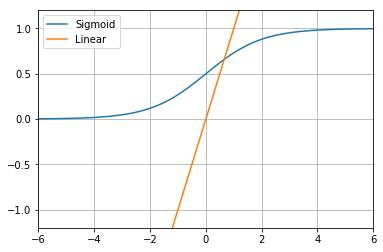

In [0]:
#@title 線形関数
# This code will be hidden when the notebook is loaded.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def linear(x):
  return x

x = np.arange(-6.0, 6.0, 0.001)
plt.plot(x, sigmoid(x), label = "Sigmoid")
plt.plot(x, linear(x), label = "Linear")
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.grid()
plt.legend()
plt.show()

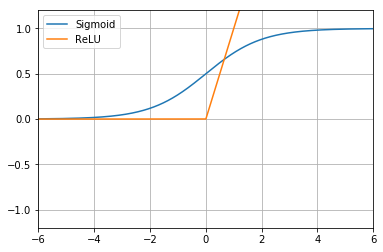

In [0]:
#@title ReLU関数
# This code will be hidden when the notebook is loaded.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.arange(-6.0, 6.0, 0.001)
plt.plot(x, sigmoid(x), label = "Sigmoid")
plt.plot(x, relu(x), label = "ReLU")
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.grid()
plt.legend()
plt.show()

### リスト4-3　活性化関数の指定例

In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
# ライブラリ「NumPy」のnumpyパッケージを「np」という別名でインポート
import numpy as np

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2      # 入力（特徴）の数： 2
LAYER1_NEURONS = 3      # ニューロンの数： 3
LAYER2_NEURONS = 3      # ニューロンの数： 3
OUTPUT_RESULTS = 1      # 出力結果の数： 1
ACTIVATION = 'sigmoid'  # 活性化関数（ここを書き換える）： シグモイド関数

# 積層型のモデルの定義
model = tf.keras.models.Sequential([
  # 隠れ層：1つ目のレイヤー
  tf.keras.layers.Dense(
    input_shape=(INPUT_FEATURES,),       # 入力の形状（＝入力層）
    units=LAYER1_NEURONS,                # ユニットの数
    activation=ACTIVATION),              # 活性化関数
  # 隠れ層：2つ目のレイヤー
  tf.keras.layers.Dense(
    units=LAYER2_NEURONS,                # ユニットの数
    activation=ACTIVATION),              # 活性化関数
  # 出力層
  tf.keras.layers.Dense(
    units=OUTPUT_RESULTS,                # ユニットの数
    activation='tanh'),                  # 活性化関数
])

## ■（4）“手法” の選択とモデルの定義： 正則化

### リスト4-4　正則化の指定例

In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
# ライブラリ「NumPy」のnumpyパッケージを「np」という別名でインポート
import numpy as np

# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2      # 入力（特徴）の数： 2
LAYER1_NEURONS = 3      # ニューロンの数： 3
LAYER2_NEURONS = 3      # ニューロンの数： 3
OUTPUT_RESULTS = 1      # 出力結果の数： 1
ACTIVATION = 'tanh'     # 活性化関数（ここを書き換える）： シグモイド関数
REGULARIZATION = tf.keras.regularizers.l2(0.03)  # 正則化： L2、 正則化率： 0.03

# 積層型のモデルの定義
model = tf.keras.models.Sequential([
  # 隠れ層：1つ目のレイヤー
  tf.keras.layers.Dense(
    input_shape=(INPUT_FEATURES,),        # 入力の形状（＝入力層）
    units=LAYER1_NEURONS,                 # ユニットの数
    activation=ACTIVATION,                # 活性化関数
    kernel_regularizer= REGULARIZATION),  # 正則化
                  
  # 隠れ層：2つ目のレイヤー
  tf.keras.layers.Dense(
    units=LAYER2_NEURONS,                 # ユニットの数
    activation=ACTIVATION,                # 活性化関数
    kernel_regularizer= REGULARIZATION),  # 正則化

  # 出力層
  tf.keras.layers.Dense(
    units=OUTPUT_RESULTS,                 # ユニットの数
    activation='tanh',                    # 活性化関数
    kernel_regularizer= REGULARIZATION)   # 正則化    
])

# 第3回　ディープラーニング最速入門 ― 仕組み理解×初実装（後編）

## ■（5）“学習方法” の設計とモデルの生成： 損失関数

### リスト5-1　損失関数の定義

In [0]:
# 定数（学習方法設計時に必要となる数値）
LOSS = 'mean_squared_error'  # 損失関数：平均二乗誤差

## ■（5）“学習方法” の設計とモデルの生成： 最適化

### リスト5-2　最適化の定義

In [0]:
# （必要に応じて）TensorFlow v2の最新バージョンにアップグレードする必要がある
#!pip install --upgrade tensorflow
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf

# 定数（学習方法設計時に必要となるもの）
OPTIMIZER = tf.keras.optimizers.SGD  # 最適化：確率的勾配降下法

## ■（5）“学習方法” の設計とモデルの生成： 学習率

### リスト5-3　学習率の定義

In [0]:
# 定数（学習方法設計時に必要となるもの）
LEARNING_RATE = 0.03     # 学習率： 0.03

### リスト5-4　【前回の復習】モデルの定義

In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2      # 入力（特徴）の数： 2
LAYER1_NEURONS = 3      # ニューロンの数： 3
LAYER2_NEURONS = 3      # ニューロンの数： 3
OUTPUT_RESULTS = 1      # 出力結果の数： 1
ACTIVATION = 'tanh'     # 活性化関数（ここを書き換える）： tanh関数

# 積層型のモデルの定義
model = tf.keras.models.Sequential([

  # 隠れ層：1つ目のレイヤー
  tf.keras.layers.Dense(
    input_shape=(INPUT_FEATURES,),       # 入力の形状（＝入力層）
    units=LAYER1_NEURONS,                # ユニットの数
    activation=ACTIVATION),              # 活性化関数

  # 隠れ層：2つ目のレイヤー
  tf.keras.layers.Dense(
    units=LAYER2_NEURONS,                # ユニットの数
    activation=ACTIVATION),              # 活性化関数

  # 出力層
  tf.keras.layers.Dense(
    units=OUTPUT_RESULTS,                # ユニットの数
    activation='tanh'),                  # 活性化関数
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### リスト5-5　モデルの生成

In [0]:
import tensorflow.keras.backend as K

def tanh_accuracy(y_true, y_pred):           # y_trueは正解、y_predは予測（出力）
  threshold = K.cast(0.0, y_pred.dtype)              # -1か1かを分ける閾値を作成
  y_pred = K.cast(y_pred >= threshold, y_pred.dtype) # 閾値未満で0、以上で1に変換
  # 2倍して-1.0することで、0／1を-1.0／1.0にスケール変換して正解率を計算
  return K.mean(K.equal(y_true, K.round(y_pred) * 2 - 1.0), axis=-1)

In [0]:
# 定数（学習方法設計時に必要となるもの）
LOSS = 'mean_squared_error'          # 損失関数： 平均二乗誤差
OPTIMIZER = tf.keras.optimizers.SGD  # 最適化： 確率的勾配降下法
LEARNING_RATE = 0.03                  # 学習率： 0.03

# モデルを生成する
model.compile(optimizer=OPTIMIZER(lr=LEARNING_RATE),
              loss=LOSS,
              metrics=[tanh_accuracy])  # 精度（正解率）

## ■⑥学習： トレーニング

### リスト6-1　【前回の復習】データの取得と分割

In [0]:
# （必要に応じて）座標点データを生成するライブラリをインストールする必要がある
#!pip install playground-data

# playground-dataライブラリのplygdataパッケージを「pg」という別名でインポート
import plygdata as pg

# 問題種別で「分類（Classification）」を選択し、
# データ種別で「2つのガウシアンデータ（TwoGaussData）」を選択する場合の、
# 設定値を定数として定義
PROBLEM_DATA_TYPE = pg.DatasetType.ClassifyTwoGaussData

# 各種設定を定数として定義
TRAINING_DATA_RATIO = 0.5  # データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用) ： 50％
DATA_NOISE = 0.0           # ノイズ： 0％

# 定義済みの定数を引数に指定して、データを生成する
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)

# データを「訓練用」と「精度検証用」を指定の比率で分割し、さらにそれぞれを「データ（X）」と「教師ラベル（y）」に分ける
X_train, y_train, X_valid, y_valid = pg.split_data(data_list, training_size=TRAINING_DATA_RATIO)

In [7]:
# それぞれ5件ずつ出力
print('X_train:'); print(X_train[:5])
print('y_train:'); print(y_train[:5])
print('X_valid:'); print(X_valid[:5])
print('y_valid:'); print(y_valid[:5])

X_train:
[[-3.14235882 -2.06319695]
 [-2.21140191 -1.68500123]
 [-2.27494093 -0.58023122]
 [ 1.74282335  1.56192155]
 [-3.07785159 -1.72988131]]
y_train:
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]]
X_valid:
[[ 1.47480725  3.59821988]
 [-2.14583251 -1.93423211]
 [ 1.29681706  2.24283417]
 [ 1.78524761  2.16130717]
 [-1.37062409 -1.96180036]]
y_valid:
[[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]]


### リスト6-2　学習

In [0]:
# 定数（学習方法設計時に必要となるもの）
BATCH_SIZE = 1   # バッチサイズ： 1（選択肢は「1」～「30」）
EPOCHS = 100     # エポック数： 100

# 学習する（※次の「リスト6-3　ミニバッチ学習」で実行するので、ここではまだ実行しないこと）
#hist = model.fit(x=X_train,                          # 訓練用データ
#                 y=y_train,                          # 訓練用ラベル
#                 validation_data=(X_valid, y_valid), # 精度検証用
#                 batch_size=BATCH_SIZE,              # バッチサイズ
#                 epochs=EPOCHS,                      # エポック数
#                 verbose=1)                          # 実行状況表示

## ■⑥学習： バッチサイズ

###リスト6-3　ミニバッチ学習

In [12]:
# 定数（学習方法設計時に必要となるもの）
BATCH_SIZE = 15  # バッチサイズ： 15（選択肢は「1」～「30」）
EPOCHS = 100     # エポック数： 100

# 学習する
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_data=(X_valid, y_valid), # 精度検証用
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1)                          # 実行状況表示

Train on 250 samples, validate on 250 samples
Epoch 1/100
250/250 [==============================] - 1s 3ms/sample - loss: 0.5956 - tanh_accuracy: 0.8000 - val_loss: 0.1414 - val_tanh_accuracy: 1.0000
Epoch 2/100
250/250 [==============================] - 0s 253us/sample - loss: 0.0897 - tanh_accuracy: 1.0000 - val_loss: 0.0584 - val_tanh_accuracy: 1.0000
Epoch 3/100
250/250 [==============================] - 0s 256us/sample - loss: 0.0447 - tanh_accuracy: 1.0000 - val_loss: 0.0356 - val_tanh_accuracy: 1.0000
Epoch 4/100
250/250 [==============================] - 0s 251us/sample - loss: 0.0293 - tanh_accuracy: 1.0000 - val_loss: 0.0253 - val_tanh_accuracy: 1.0000
Epoch 5/100
250/250 [==============================] - 0s 257us/sample - loss: 0.0216 - tanh_accuracy: 1.0000 - val_loss: 0.0195 - val_tanh_accuracy: 1.0000
Epoch 6/100
250/250 [==============================] - 0s 252us/sample - loss: 0.0170 - tanh_accuracy: 1.0000 - val_loss: 0.0158 - val_tanh_accuracy: 1.0000
Epoch 7/100
25

## ■⑦評価： 損失のグラフ

### リスト7-1　損失値の推移グラフ描画

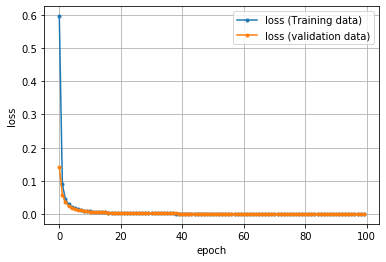

In [13]:
import matplotlib.pyplot as plt

# 学習結果（損失）のグラフを描画
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
epochs = len(train_loss)
plt.plot(range(epochs), train_loss, marker='.', label='loss (Training data)')
plt.plot(range(epochs), valid_loss, marker='.', label='loss (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### リスト7-2　コールバックの指定（早期終了とCSVログ出力）

In [22]:
# 早期終了
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# CSVロガー
csv_logger = tf.keras.callbacks.CSVLogger('training.log')

# 学習する
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_data=(X_valid, y_valid), # 精度検証用
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1,                          # 実行状況表示
                 callbacks=[es, csv_logger])         # コールバック

Train on 250 samples, validate on 250 samples
Epoch 1/1000
250/250 [==============================] - 0s 233us/sample - loss: 1.0017e-04 - tanh_accuracy: 1.0000 - val_loss: 9.4172e-05 - val_tanh_accuracy: 1.0000
Epoch 2/1000
250/250 [==============================] - 0s 216us/sample - loss: 1.0000e-04 - tanh_accuracy: 1.0000 - val_loss: 9.4016e-05 - val_tanh_accuracy: 1.0000
Epoch 3/1000
250/250 [==============================] - 0s 225us/sample - loss: 9.9837e-05 - tanh_accuracy: 1.0000 - val_loss: 9.3861e-05 - val_tanh_accuracy: 1.0000
Epoch 4/1000
250/250 [==============================] - 0s 258us/sample - loss: 9.9673e-05 - tanh_accuracy: 1.0000 - val_loss: 9.3706e-05 - val_tanh_accuracy: 1.0000
Epoch 5/1000
250/250 [==============================] - 0s 228us/sample - loss: 9.9510e-05 - tanh_accuracy: 1.0000 - val_loss: 9.3552e-05 - val_tanh_accuracy: 1.0000
Epoch 6/1000
250/250 [==============================] - 0s 221us/sample - loss: 9.9347e-05 - tanh_accuracy: 1.0000 - val_los

In [0]:
# CSVログ出力ファイルをダウンロード
from google.colab import files
files.download('training.log')

## ■⑧テスト： 未知データで推論と評価

### リスト8-1　未知データによるテスト（推論と評価）

In [25]:
import plygdata as pg
import numpy as np

# 未知のテストデータを生成
PROBLEM_DATA_TYPE = pg.DatasetType.ClassifyTwoGaussData
TEST_DATA_RATIO = 1.0  # データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用) ： 100％
DATA_NOISE = 0.0       # ノイズ： 0％
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)
X_test, y_test, _, _ = pg.split_data(data_list, training_size=TEST_DATA_RATIO)

# 学習済みモデルを使って推論
result_proba = model.predict(X_test)
result_class = np.frompyfunc(lambda x: 1 if (x >= 0.0) else -1, 1, 1)(result_proba) # 離散化
# それぞれ5件ずつ出力
print('proba:'); print(result_proba[:5])  # 予測
print('class:'); print(result_class[:5])  # 分類

# 未知のテストデータで学習済みモデルの汎化性能を評価
score = model.evaluate(X_test, y_test)
print('test loss:', score[0])  # 損失
print('test acc:', score[1])   # 正解率

proba:
[[-0.9952776 ]
 [ 0.99479544]
 [-0.9930786 ]
 [ 0.99473053]
 [-0.9950487 ]]
class:
[[-1]
 [1]
 [-1]
 [1]
 [-1]]
500/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## ■おまけ

### リスト9-1　ニューラルネットワーク内の重みやバイアスを調べるためのサンプルコード

In [28]:
start_index = 0 # Sequential（積層型）モデルの場合は、0スタート
#start_index = 1 # Functional（関数型）APIの場合は、0が入力層になっているので注意


# 隠れ層1
hidden1_layer = model.layers[start_index]
print(' 隠れ層1：',hidden1_layer.name)
hidden1_weights =  hidden1_layer.get_weights()
print(hidden1_weights)
# weights = hidden1_weights[0]
h1_w1 = hidden1_weights[0][0, 0]
h1_w2 = hidden1_weights[0][1, 0]
# biases = hidden1_weights[1]
h1_b = hidden1_weights[1][0]
# 一部を出力
print('h1_w1=',h1_w1)
print('h1_w2=',h1_w2)
print('h1_b=',h1_b)
print()

# 中間レイヤーにおける出力例
print(' 隠れ層1の出力')
test_data = np.array([[0.4, 3.2], [5.8, 3.1], [-5.8, -3.1]], dtype=np.float32)
intermediate1_model = tf.keras.models.Model(inputs=model.input, outputs=hidden1_layer.output)
intermediate1_output = intermediate1_model.predict(test_data)
print(intermediate1_output)
print()


# 隠れ層2
hidden2_layer = model.layers[start_index+1]
print(' 隠れ層2：',hidden2_layer.name)
hidden2_weights =  hidden2_layer.get_weights()
print(hidden2_weights)
# weights = hidden2_weights[0]
h2_w1 = hidden2_weights[0][0, 0]
h2_w2 = hidden2_weights[0][1, 0]
# biases = hidden2_weights[1]
h2_b = hidden2_weights[1][0]
# 一部を出力
print('h2_w1=',h2_w1)
print('h2_w2=',h2_w2)
print('h2_b=',h2_b)
print()

# 中間レイヤーにおける出力例
print(' 隠れ層2の出力')
test_data = np.array([[0.4, 3.2], [5.8, 3.1], [-5.8, -3.1]], dtype=np.float32)
intermediate2_model = tf.keras.models.Model(inputs=model.input, outputs=hidden2_layer.output)
intermediate2_output = intermediate2_model.predict(test_data)
print(intermediate2_output)
print()


# 出力層
output_layer = model.layers[start_index+2]
print(' 出力層：',output_layer.name)
output_weights =  output_layer.get_weights()
print(output_weights)
# weights = output_weights[0]
o_w1 = output_weights[0][0, 0]
o_w2 = output_weights[0][1, 0]
# biases = output_weights[1]
o_b = output_weights[1][0]
# 一部を出力
print('o_w1=',o_w1)
print('o_w2=',o_w2)
print('o_b=',o_b)
print()

# 出力レイヤーにおける出力例
print('出力層の出力＝モデル全体の出力')
output_model = tf.keras.models.Model(inputs=model.input, outputs=output_layer.output)
output_output = output_model.predict(test_data)
print(output_output)
print()

print('モデル全体の出力')
test_data = np.array([[0.4, 3.2], [5.8, 3.1], [-5.8, -3.1]], dtype=np.float32)
result = model.predict(test_data)
print(result)

 隠れ層1： dense
[array([[ 0.48216328, -0.7935021 , -0.6165635 ],
       [ 0.8823196 , -0.51038545,  0.7070052 ]], dtype=float32), array([-0.02397198,  0.02960116,  0.0038539 ], dtype=float32)]
h1_w1= 0.48216328
h1_w2= 0.8823196
h1_b= -0.023971979

 隠れ層1の出力
[[ 0.99497837 -0.95800227  0.9653895 ]
 [ 0.9999672  -0.99999106 -0.88106275]
 [-0.9999702   0.99999195  0.8827756 ]]

 隠れ層2： dense_1
[array([[ 0.23945466, -0.52975863,  0.6633203 ],
       [-0.81996644,  0.22503906, -1.514059  ],
       [-0.11152942, -1.0818968 ,  0.5646103 ]], dtype=float32), array([-0.00509438, -0.00965274, -0.03851714], dtype=float32)]
h2_w1= 0.23945466
h2_w2= -0.81996644
h2_b= -0.0050943843

 隠れ層2の出力
[[ 0.7216206  -0.94647264  0.9893925 ]
 [ 0.81860566  0.18657652  0.92766374]
 [-0.8220012  -0.20691358 -0.937554  ]]

 出力層： dense_2
[array([[ 0.9164784 ],
       [-0.20014854],
       [ 2.165541  ]], dtype=float32), array([-0.01153944], dtype=float32)]
o_w1= 0.9164784
o_w2= -0.20014854
o_b= -0.011539436

出力層の出力＝モデル全体の

# お疲れさまでした。『ニューラルネットワーク、仕組みの理解×初めての実装』は修了です。